In [1]:
%matplotlib inline
%cd ..

/Users


In [2]:
from numpy import *
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [3]:
#file_folder = '/Users/nfortune/Google Drive File Stream/My Drive/Python Workspace/tutorials/'
file_folder = ''

In [4]:
file_name = '650 nm calibration.csv'

In [5]:
angle, V_pd = loadtxt(file_folder + file_name, delimiter = ',', skiprows =1, unpack = True)

In [6]:
print(angle)

[  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345. 360.]


In [7]:
print(V_pd)

[32.3625 30.0808 24.0285 15.8815  7.7794  1.9571  0.0357  2.5839  8.946
 17.386  25.6438 31.3107 33.0189 30.286  23.8906 15.6139  7.5459  1.8841
  0.0338  2.4588  8.5142 16.6195 24.6587 30.5141 32.5163]


In [8]:
V0 = 30.0    #peak value - offset voltage, in mV
dV0 = 0.02 # initial guess, in mV

theta0 = -2.0 * pi / 180   #offset angle of 1 degree, in radians
dtheta = 0.5 * pi / 180       # phi = theta - theta0. Leave this unchanged. 

V1 = 0.02 #offset voltage, in mV
dV1 = 0.014 #initial guess, in mV

theta = angle * pi/180 

In [9]:
def polarization_model_1( phi, V_0, phi_0, V_1): # variation of light intensity with  relative polarizer angle
    return V_0 * (1 + cos(2 * (phi - phi_0)))/2 + V_1

In [10]:
def sigma(phi_array, delta_V0, delta_phi, delta_V1, V_0, phi_0):  #calculate delta_V_pd
    V_0_error_sq= (delta_V0 / V_0)**2 * (cos(phi_array - phi_0))**4
    phi_error_sq = (delta_phi)**2 * (2 * cos(phi_array- phi_0) * sin(phi_array - phi_0))**2
    V_1_error_sq = (delta_V1 / V_0)**2 
    fractional_error = sqrt(V_0_error_sq + V_1_error_sq + phi_error_sq)
    return fractional_error * V_0

In [11]:
initial_guess = array([V0, theta0, V1])
initial_error = array([dV0, dtheta, dV1])
print(initial_guess)
print(initial_error)

[ 3.0000000e+01 -3.4906585e-02  2.0000000e-02]
[0.02       0.00872665 0.014     ]


In [12]:
estimated_error = sigma(theta, dV0, dtheta, dV1, V0, theta0 )
print(estimated_error)

[0.03047186 0.14819727 0.23615829 0.26170202 0.21753725 0.11562049
 0.02301105 0.14707419 0.23578674 0.26175532 0.21805076 0.11716491
 0.03047186 0.14819727 0.23615829 0.26170202 0.21753725 0.11562049
 0.02301105 0.14707419 0.23578674 0.26175532 0.21805076 0.11716491
 0.03047186]


In [13]:
estimated_error = sigma(theta, dV0, dtheta, dV1, V0, theta0 )

fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = initial_guess, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(initial_guess)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.0000000e+01 -3.4906585e-02  2.0000000e-02]
[ 3.26313779e+01 -2.02784389e-02  2.30194631e-02]

chi-square         =  15.744330688771445
degrees of freedom =  22
reduced chi-square =  0.7156513949441566
fractional probability of chisq ≤ 15.744330688771445 for  22 dof is 0.17163107599593747


In [14]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26313779e+01 -2.02784389e-02  2.30194631e-02]
[ 3.26303079e+01 -2.01519562e-02  2.24248238e-02]

chi-square         =  14.004062546257751
degrees of freedom =  22
reduced chi-square =  0.6365482975571705
fractional probability of chisq ≤ 14.004062546257751 for  22 dof is 0.098665043275515


In [15]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26303079e+01 -2.01519562e-02  2.24248238e-02]
[ 3.26296873e+01 -2.01549132e-02  2.22848239e-02]

chi-square         =  14.721623038261729
degrees of freedom =  22
reduced chi-square =  0.6691646835573514
fractional probability of chisq ≤ 14.721623038261729 for  22 dof is 0.12609500101904145


In [16]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26296873e+01 -2.01549132e-02  2.22848239e-02]
[ 3.26291262e+01 -2.01588101e-02  2.22188497e-02]

chi-square         =  15.310662879986436
degrees of freedom =  22
reduced chi-square =  0.6959392218175653
fractional probability of chisq ≤ 15.310662879986436 for  22 dof is 0.15143555577840176


In [17]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26291262e+01 -2.01588101e-02  2.22188497e-02]
[ 3.26287787e+01 -2.01612643e-02  2.21877295e-02]

chi-square         =  15.673791099592139
degrees of freedom =  22
reduced chi-square =  0.7124450499814609
fractional probability of chisq ≤ 15.673791099592139 for  22 dof is 0.168260834880863


In [18]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26287787e+01 -2.01612643e-02  2.21877295e-02]
[ 3.26285898e+01 -2.01626123e-02  2.21731366e-02]

chi-square         =  15.872109682957621
degrees of freedom =  22
reduced chi-square =  0.7214595310435282
fractional probability of chisq ≤ 15.872109682957621 for  22 dof is 0.17781804894098555


In [19]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26285898e+01 -2.01626123e-02  2.21731366e-02]
[ 3.26284932e+01 -2.01632934e-02  2.21663155e-02]

chi-square         =  15.973685342718456
degrees of freedom =  22
reduced chi-square =  0.7260766064872025
fractional probability of chisq ≤ 15.973685342718456 for  22 dof is 0.1828103423056013


In [20]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284932e+01 -2.01632934e-02  2.21663155e-02]
[ 3.26284455e+01 -2.01636323e-02  2.21631062e-02]

chi-square         =  16.023895548006696
degrees of freedom =  22
reduced chi-square =  0.7283588885457589
fractional probability of chisq ≤ 16.023895548006696 for  22 dof is 0.18530193035377246


In [21]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284455e+01 -2.01636323e-02  2.21631062e-02]
[ 3.26284225e+01 -2.01637914e-02  2.21616713e-02]

chi-square         =  16.048049109444566
degrees of freedom =  22
reduced chi-square =  0.7294567777020258
fractional probability of chisq ≤ 16.048049109444566 for  22 dof is 0.18650606146256496


In [22]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284225e+01 -2.01637914e-02  2.21616713e-02]
[ 3.26284114e+01 -2.01638823e-02  2.21609737e-02]

chi-square         =  16.05962331425417
degrees of freedom =  22
reduced chi-square =  0.7299828779206442
fractional probability of chisq ≤ 16.05962331425417 for  22 dof is 0.18708434410709485


In [23]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284114e+01 -2.01638823e-02  2.21609737e-02]
[ 3.26284062e+01 -2.01639099e-02  2.21606397e-02]

chi-square         =  16.065123160319033
degrees of freedom =  22
reduced chi-square =  0.7302328709235923
fractional probability of chisq ≤ 16.065123160319033 for  22 dof is 0.18735942133380706


In [24]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284062e+01 -2.01639099e-02  2.21606397e-02]
[ 3.26284039e+01 -2.01639420e-02  2.21603964e-02]

chi-square         =  16.067779465014535
degrees of freedom =  22
reduced chi-square =  0.7303536120461153
fractional probability of chisq ≤ 16.067779465014535 for  22 dof is 0.1874923439713511


In [25]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284039e+01 -2.01639420e-02  2.21603964e-02]
[ 3.26284026e+01 -2.01639383e-02  2.21604798e-02]

chi-square         =  16.068760330262933
degrees of freedom =  22
reduced chi-square =  0.7303981968301333
fractional probability of chisq ≤ 16.068760330262933 for  22 dof is 0.187541437818552


In [26]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284026e+01 -2.01639383e-02  2.21604798e-02]
[ 3.26284021e+01 -2.01639563e-02  2.21603580e-02]

chi-square         =  16.0694682732299
degrees of freedom =  22
reduced chi-square =  0.7304303760559047
fractional probability of chisq ≤ 16.0694682732299 for  22 dof is 0.1875768751369495


In [27]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284021e+01 -2.01639563e-02  2.21603580e-02]
[ 3.26284019e+01 -2.01639447e-02  2.21603231e-02]

chi-square         =  16.069763232726796
degrees of freedom =  22
reduced chi-square =  0.7304437833057634
fractional probability of chisq ≤ 16.069763232726796 for  22 dof is 0.18759164075389725


In [28]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284019e+01 -2.01639447e-02  2.21603231e-02]
[ 3.26284017e+01 -2.01639395e-02  2.21603984e-02]

chi-square         =  16.069768996883578
degrees of freedom =  22
reduced chi-square =  0.7304440453128899
fractional probability of chisq ≤ 16.069768996883578 for  22 dof is 0.18759192931180763


In [29]:
estimated_error = sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])


fit, covariance = curve_fit(polarization_model_1, theta, V_pd, 
                       p0 = fit, 
                       sigma = estimated_error, absolute_sigma = True)
error = sqrt(diag(covariance))

print()
print(old_fit)
print(fit)
old_fit = copy(fit)
print()

V_pd_model = polarization_model_1(theta, fit[0], fit[1], fit[2])
residual = V_pd - V_pd_model

chisq = sum((residual/ estimated_error))**2
degrees_of_freedom = len(residual) - len(initial_guess)
reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent

print('chi-square         = ',chisq)
print('degrees of freedom = ',degrees_of_freedom)
print('reduced chi-square = ',reduced_chisq)
print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)


[ 3.26284017e+01 -2.01639395e-02  2.21603984e-02]
[ 3.26284017e+01 -2.01639444e-02  2.21603133e-02]

chi-square         =  16.069961300051425
degrees of freedom =  22
reduced chi-square =  0.7304527863659739
fractional probability of chisq ≤ 16.069961300051425 for  22 dof is 0.1876015562658261


In [30]:
print('V_0 =  ','{:.3f}'.format(fit[0]), '±', '{:.3f}'.format(error[0]), 'mV')
print('V_1 =   ','{:.3f}'.format(fit[2]), '±', '{:.3f}'.format(error[2]), 'mV')
print('phi_0 =','{:.2f}'.format(fit[1]*180 / pi), ' ±', '{:.2f}'.format(error[1]*180 / pi), ' degree')

V_0 =   32.628 ± 0.019 mV
V_1 =    0.022 ± 0.012 mV
phi_0 = -1.16  ± 0.11  degree


In [31]:
V_pd_delta =  sigma(theta, error[0], dtheta, error[2], fit[0], fit[1])

In [32]:
from matplotlib import pyplot as plt         #this is the traditional method

from matplotlib import rc                    #this allows you to change overall settings
rc('xtick', labelsize = 18)                  #use 18 point font for numbering on x axis
rc('ytick', labelsize = 18)                  #use 18 point font for numbering on y axis



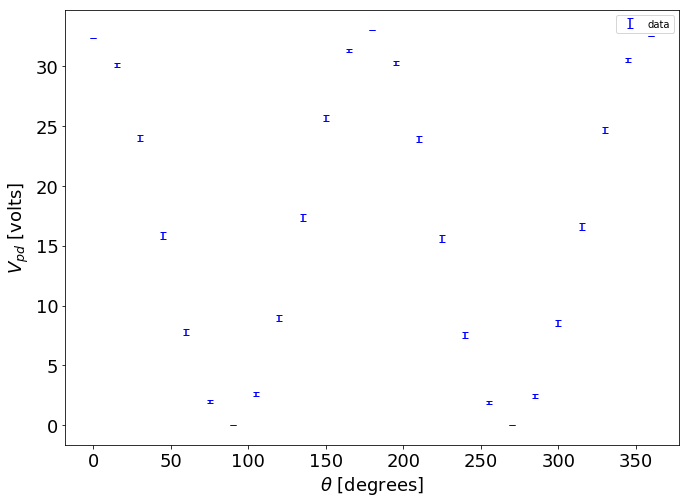

In [33]:
plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
                                             #for default size, type plt.figure() 
                                             
plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [volts]", fontsize = 18)   #use 18 point font for label text

plt.errorbar(angle, V_pd,  
    xerr=None, yerr=V_pd_delta, 
    linestyle = 'none', 
    color = 'blue',  
    capsize = 3, capthick = 1, label = "data")


#create curve showing fit to data 
angle_fit = linspace(0, 360, 180)
theta_fit = angle_fit * pi / 180
V_pd_fit = polarization_model_1(theta_fit, fit[0], fit[1], fit[2])


plt.legend(loc = 'best')
    
plt.show()    

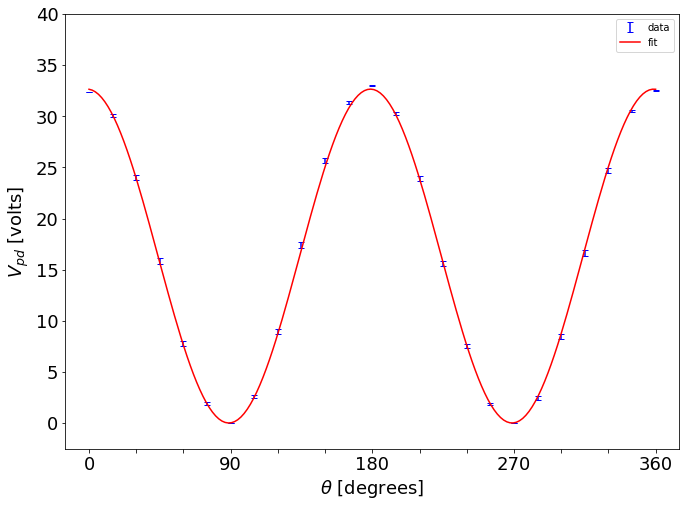

In [34]:
plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
                                             #for default size, type plt.figure() 
                                             
plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [volts]", fontsize = 18)   #use 18 point font for label text

plt.errorbar(angle, V_pd,  
    xerr=None, yerr=V_pd_delta, 
    linestyle = 'none', 
    color = 'blue',  
    capsize = 3, capthick = 1, label = "data")


#create curve showing fit to data 
angle_fit = linspace(0, 360, 180)
theta_fit = angle_fit * pi / 180
V_pd_fit = polarization_model_1(theta_fit, fit[0], fit[1], fit[2])

#plot the curve fit 
plt.errorbar(angle_fit, V_pd_fit, xerr = None, yerr = None, color = 'red', label = 'fit' )
plt.xlim(-15, 375)
plt.ylim(-2.5, 40)
plt.xticks([0,   30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360], 
           ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')
    
plt.show()    

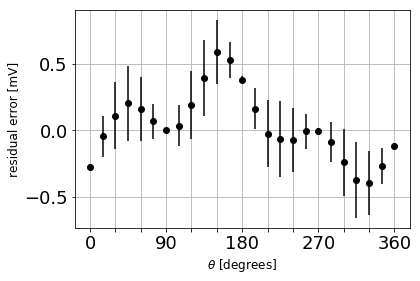

average residual error |model-data|  = 0.192 mV
average experimental uncertainty     = 0.175 mV


In [35]:
residual = V_pd - V_pd_model

plt.figure()
plt.xlabel(r"$\theta$ [degrees]", fontsize = 12)
plt.ylabel(r"residual error [mV]", fontsize = 12)
plt.errorbar(angle, residual, xerr=None, yerr= V_pd_delta, linestyle = 'none', color = 'black', marker = 'o')
plt.xticks([0,   30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360], 
           ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.grid(1)
plt.show()

print('average residual error |model-data|  =', '{:.3f}'.format(average(absolute(residual))), 'mV')
print('average experimental uncertainty     =', '{:.3f}'.format(average(V_pd_delta)), 'mV')

In [36]:

output_filename = file_folder + 'Calibration_650nm.csv'                   #provide a name for the new file
header_row_text = 'angle, V_pd, V_pd_error'      #make first row of file be a list of column names. Optional. 
comment_text = ''                                #do not start header row with a '#'. Optional. 
#comment_text = '#'                              #start the header row with a '#' . Default setting. 

data = array([angle, V_pd, V_pd_delta]).T        #create a 2D matrix and transpose rows and columns (clever trick) 
savetxt(output_filename, data, delimiter = ',', header = header_row_text, comments = comment_text) 